
<h1 align=center><font size = 5> <center>文本分析与挖掘</center> </font></h1> 

<h2 align=center><font size = 4><center>实验六、基于多层感知机的文本分类</center></font></h2>
<h2 align=center><font size = 2><center>浙江工业大学计算机科学与技术学院</center></font></h2>

## 一、实验目的

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li>使用多层感知机对文本数据进行分类，对比不同预处理和参数对分类结果的影响。</li>
<li> 熟悉多层感知机的分类过程。</li>
    

## 二、实验内容
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li>基于词袋表示为输入的多层感知机分类</li>
<li>基于词嵌入为输入的多层感知机分类 </li>



In [19]:
from sklearn.datasets import fetch_20newsgroups
import pandas  as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import spacy
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator

### 把 20newsgroups（全部 20 个类）按 4：1 分成训练和测试集。再从训练集里面分出 10%作为验证集。

In [2]:
data_df=pd.read_csv('./data.csv')

In [3]:
data_df

,Article,Clean Article,Target Label,Target Name
0,\n\nI am sure some bashers of Pens fans are pr...,sure basher pen fan pretti confus lack ani kin...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,brother market high-perform video card support...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,&#9 ; final said dream about. mediterranean?? ...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,think ! ' scsi card dma transfer disk ... scsi...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,1 ) old jasmin drive cannot use new system. un...,4,comp.sys.mac.hardware
...,...,...,...,...
18325,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,dn> : nyeda@cnsvax.uwec.edu ( david nye ) dn> ...,13,sci.med
18326,\nNot in isolated ground recepticles (usually ...,"isol ground recepticl ( usual unusu color , or...",12,sci.electronics
18327,I just installed a DX2-66 CPU in a clone mothe...,"instal dx2-66 cpu clone motherboard , tri moun...",3,comp.sys.ibm.pc.hardware
18328,\nWouldn't this require a hyper-sphere. In 3-...,"' thi requir hyper-sphere. 3-space , 4 point s...",1,comp.graphics


In [4]:
x_train_vali, x_test, y_train_vali, y_test = train_test_split(data_df['Clean Article'],data_df['Target Label'] , test_size = 0.20, random_state = 42)
x_train,x_vali, y_train, y_vali = train_test_split(x_train_vali, y_train_vali, test_size = 0.1, random_state = 42)

### 1.基于词袋表示为输入的多层感知机分类

#### a. 采用实验 3 中的预处理对训练集和测试集进行预处理并得到词袋表示。

In [5]:
tv = TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=True) 


tv_train_features = tv.fit_transform(x_train) 

tv_test_features=tv.transform(x_test)
tv_vail_features=tv.transform(x_vali)

In [28]:
tv_train_features.shape

(13197, 103025)

#### b. 创建具有单层隐藏层（256 个节点）的多层感知机，设置激活函数为 ReLu，初始学习率为 0.001，轮数 epoch 为 50,用训练集对模型进行训练，画出学习曲线（训练、验证损失以及准确率）。观察曲线，讨论模型的学习情况（欠拟合、过拟合）


In [39]:
batch_size =100
epochs =50
learn_rate=0.001
input_shape=(103025,)

In [43]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(256,activation='relu',input_dim=103025))
model.add(keras.layers.Dense(20,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               26374656  
_________________________________________________________________
dense_7 (Dense)              (None, 20)                5140      
Total params: 26,379,796
Trainable params: 26,379,796
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])

In [46]:
history=model.fit(tv_train_features.toarray(),y_train,epochs=epochs,validation_data=(tv_vail_features.toarray(),y_vali))

Epoch 1/50
413/413 [==============================] - 17s 40ms/step - loss: 2.9931 - accuracy: 0.0666 - val_loss: 2.9897 - val_accuracy: 0.0682
Epoch 2/50
413/413 [==============================] - 7s 17ms/step - loss: 2.9874 - accuracy: 0.0755 - val_loss: 2.9841 - val_accuracy: 0.0818
Epoch 3/50
413/413 [==============================] - 7s 17ms/step - loss: 2.9819 - accuracy: 0.0999 - val_loss: 2.9787 - val_accuracy: 0.1166
Epoch 4/50
413/413 [==============================] - 7s 17ms/step - loss: 2.9764 - accuracy: 0.1458 - val_loss: 2.9735 - val_accuracy: 0.1234
Epoch 5/50
413/413 [==============================] - 7s 17ms/step - loss: 2.9709 - accuracy: 0.1641 - val_loss: 2.9680 - val_accuracy: 0.1677
Epoch 6/50
413/413 [==============================] - 7s 17ms/step - loss: 2.9653 - accuracy: 0.1891 - val_loss: 2.9625 - val_accuracy: 0.2284
Epoch 7/50
413/413 [==============================] - 7s 17ms/step - loss: 2.9596 - accuracy: 0.2348 - val_loss: 2.9571 - val_accuracy: 0.260

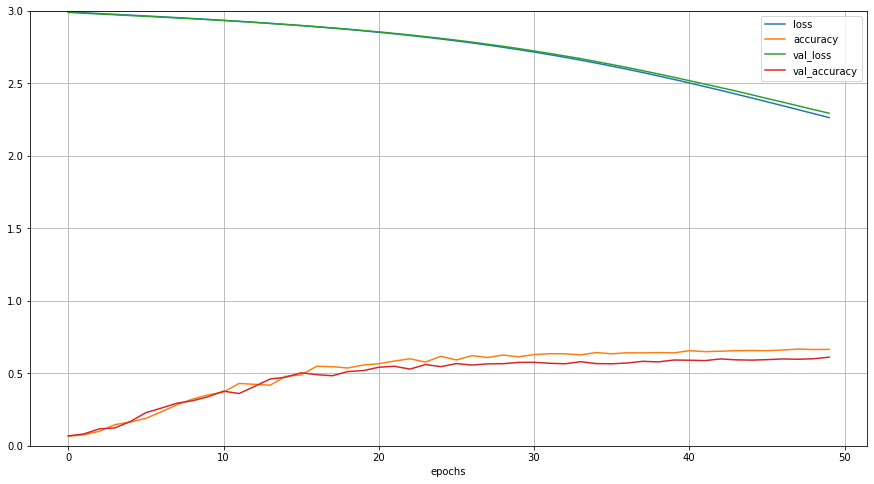

In [61]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.xlabel("epochs")
plt.show()

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
随着训练轮次的增加，模型的精度除了有些轻微抖动外，总趋势在上升，loss在总趋势下也在下降，最后在将近25epoch左右模型的精度趋于平等。未发现明显的过拟合和欠拟合现象。

#### c. 得到测试集准确率，并对比实验 3 中基于朴素贝叶斯算法的结果。

In [64]:
model.evaluate(tv_test_features.toarray(),y_test)

115/115 [==============================] - 1s 10ms/step - loss: 2.3025 - accuracy: 0.6143


[2.302476406097412, 0.6142935156822205]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
实验3基于朴素贝叶斯算法的准确率为0.71左右，说明这个模型的性能还不是很强，需要调整。

#### d. 尝试改变实验设置（增加隐藏层节点个数、增加层数、初始学习率、优化器、增加 epoch 数目等）来提升测试集准确率并讨论结果。

In [6]:

batch_size =100
epochs =100
learn_rate=0.001

input_shape=(103025,)
model=keras.models.Sequential()
model.add(keras.layers.Dense(512,activation='relu',input_dim=103025))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(80,activation='relu'))
model.add(keras.layers.Dense(20,activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               52749312  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                20560     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1620      
Total params: 52,902,820
Trainable params: 52,902,820
Non-trainable params: 0
_________________________________________________________________


In [7]:
keras.optimizers.SGD(lr=learn_rate)
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history=model.fit(tv_train_features.toarray(),y_train,batch_size=batch_size,epochs=epochs,validation_data=(tv_vail_features.toarray(),y_vali))

Epoch 1/100
132/132 [==============================] - 29s 219ms/step - loss: 2.9951 - accuracy: 0.0563 - val_loss: 2.9942 - val_accuracy: 0.0729
Epoch 2/100
132/132 [==============================] - 6s 46ms/step - loss: 2.9937 - accuracy: 0.0713 - val_loss: 2.9927 - val_accuracy: 0.0954
Epoch 3/100
132/132 [==============================] - 6s 44ms/step - loss: 2.9924 - accuracy: 0.0912 - val_loss: 2.9912 - val_accuracy: 0.1022
Epoch 4/100
132/132 [==============================] - 6s 44ms/step - loss: 2.9911 - accuracy: 0.0972 - val_loss: 2.9898 - val_accuracy: 0.1029
Epoch 5/100
132/132 [==============================] - 6s 43ms/step - loss: 2.9898 - accuracy: 0.1123 - val_loss: 2.9885 - val_accuracy: 0.1247
Epoch 6/100
132/132 [==============================] - 6s 45ms/step - loss: 2.9885 - accuracy: 0.1211 - val_loss: 2.9871 - val_accuracy: 0.1486
Epoch 7/100
132/132 [==============================] - 6s 46ms/step - loss: 2.9871 - accuracy: 0.1395 - val_loss: 2.9857 - val_accurac

132/132 [==============================] - 6s 43ms/step - loss: 2.3512 - accuracy: 0.4625 - val_loss: 2.3615 - val_accuracy: 0.4199
Epoch 58/100
132/132 [==============================] - 6s 42ms/step - loss: 2.3016 - accuracy: 0.4797 - val_loss: 2.3139 - val_accuracy: 0.4329
Epoch 59/100
132/132 [==============================] - 6s 43ms/step - loss: 2.2515 - accuracy: 0.4918 - val_loss: 2.2690 - val_accuracy: 0.4397
Epoch 60/100
132/132 [==============================] - 6s 42ms/step - loss: 2.2021 - accuracy: 0.5050 - val_loss: 2.2232 - val_accuracy: 0.4526
Epoch 61/100
132/132 [==============================] - 6s 43ms/step - loss: 2.1535 - accuracy: 0.5182 - val_loss: 2.1821 - val_accuracy: 0.4622
Epoch 62/100
132/132 [==============================] - 6s 46ms/step - loss: 2.1054 - accuracy: 0.5325 - val_loss: 2.1383 - val_accuracy: 0.4724
Epoch 63/100
132/132 [==============================] - 6s 45ms/step - loss: 2.0585 - accuracy: 0.5386 - val_loss: 2.0954 - val_accuracy: 0.478

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
 发现仍有上升空间，继续训练20轮

In [10]:
history=model.fit(tv_train_features.toarray(),y_train,batch_size=64,epochs=20,validation_data=(tv_vail_features.toarray(),y_vali))

Epoch 1/20
207/207 [==============================] - 23s 109ms/step - loss: 0.7738 - accuracy: 0.8061 - val_loss: 1.2318 - val_accuracy: 0.6428
Epoch 2/20
207/207 [==============================] - 7s 32ms/step - loss: 0.7419 - accuracy: 0.8122 - val_loss: 1.1659 - val_accuracy: 0.6817
Epoch 3/20
207/207 [==============================] - 6s 31ms/step - loss: 0.7130 - accuracy: 0.8181 - val_loss: 1.1968 - val_accuracy: 0.6680
Epoch 4/20
207/207 [==============================] - 6s 31ms/step - loss: 0.6826 - accuracy: 0.8289 - val_loss: 1.1623 - val_accuracy: 0.6755
Epoch 5/20
207/207 [==============================] - 6s 31ms/step - loss: 0.6535 - accuracy: 0.8348 - val_loss: 1.2351 - val_accuracy: 0.6387
Epoch 6/20
207/207 [==============================] - 6s 31ms/step - loss: 0.6232 - accuracy: 0.8451 - val_loss: 1.2599 - val_accuracy: 0.6496
Epoch 7/20
207/207 [==============================] - 6s 31ms/step - loss: 0.5982 - accuracy: 0.8545 - val_loss: 1.2225 - val_accuracy: 0.65

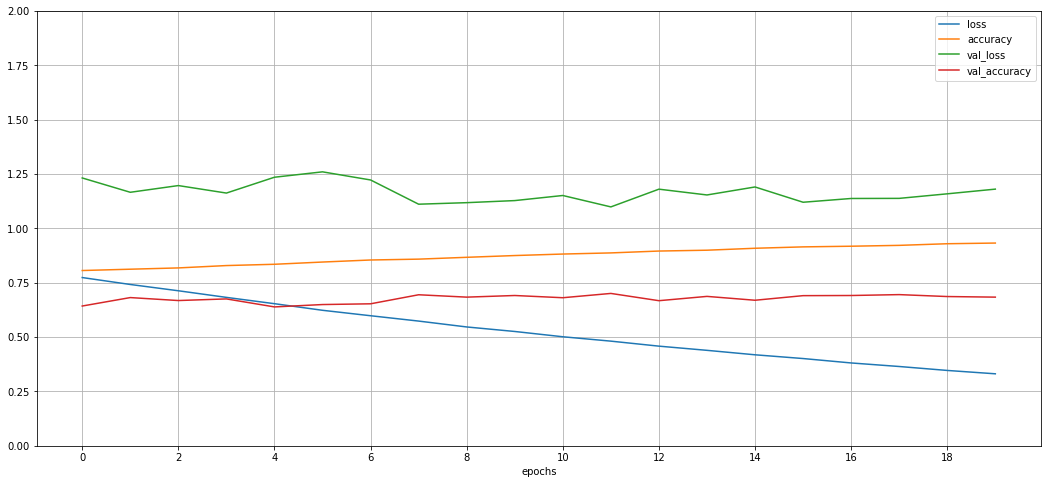

In [22]:
pd.DataFrame(history.history).plot(figsize=(18,8))
plt.grid(True)

plt.gca().set_ylim(0,2)

xy = MultipleLocator(2)    # y轴每2一个刻度
ax = plt.gca()
ax.xaxis.set_major_locator(y)
plt.xlabel("epochs")
plt.show()

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
 存在过拟合的现象，停止训练

In [13]:
model.evaluate(tv_test_features.toarray(),y_test)

115/115 [==============================] - 1s 9ms/step - loss: 1.1686 - accuracy: 0.6732


[1.1685729026794434, 0.6732133030891418]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
 在调整了网络结构（增加两层隐层和节点个数）和训练轮次后，测试集准确率为0.67左右，比原先提高了6个百分点。说明层数和训练轮次的增加可以在一定程度上提高模型的性能。

### 2.基于词嵌入为输入的多层感知机分类

#### a.得到训练集和测试集中每个词的 100 维词嵌入向量

In [25]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [28]:
glove_input_file = 'glove.6B/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B/glove.6B.100d.word2vec.txt'
(count, dimensions) = glove2word2vec(glove_input_file, word2vec_output_file)
 #加载模型
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

<ipython-input-28-3001969eed75>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  (count, dimensions) = glove2word2vec(glove_input_file, word2vec_output_file)


#### b.基于词向量得到的文档表示（直接对包含的词的向量平均）作为输入，创建具有单层隐藏层（256 个节点）的多层感知机，设置激活函数为 ReLu，初始学习率为 0.001，轮数 epoch 为 50,用训练集对模型进行训练，画出学习曲线（训练、验证损失以及准确率）， 得到测试集准确率

In [30]:
#获取平均文档向量
def average_word_vectors(words,model,vocabulary,num_features):
    feature_vector=np.zeros((num_features,),dtype='float64')
    nwords=0
    for word in words:
        if word in vocabulary:
            nwords=nwords+1
            feature_vector=np.add(feature_vector,model[word])
    if nwords:
        feature_vector=np.divide(feature_vector,nwords)
    return feature_vector

def averaged_word_vectorizer(corpus,model,num_features):
    #get the all vocabulary
    vocabulary=set(model.index_to_key)
    features=[average_word_vectors(tokenized_sentence,model,vocabulary,num_features) for tokenized_sentence in corpus]
    return np.array(features)

In [31]:
train_features=averaged_word_vectorizer(x_train,model=glove_model,num_features=100)
test_features=averaged_word_vectorizer(x_test,model=glove_model,num_features=100)
vali_features=averaged_word_vectorizer(x_vali,model=glove_model,num_features=100)

In [37]:
batch_size =64
epochs =50
learn_rate=0.001
input_shape=(103025,)

model=keras.models.Sequential()
model.add(keras.layers.Dense(256,activation='relu',input_dim=100))
model.add(keras.layers.Dense(20,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                5140      
Total params: 30,996
Trainable params: 30,996
Non-trainable params: 0
_________________________________________________________________


In [38]:
keras.optimizers.SGD(lr=learn_rate)
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history=model.fit(train_features,y_train,epochs=epochs,validation_data=(vali_features,y_vali))

Epoch 1/50
413/413 [==============================] - 1s 2ms/step - loss: 2.9939 - accuracy: 0.0586 - val_loss: 2.9877 - val_accuracy: 0.0566
Epoch 2/50
413/413 [==============================] - 1s 1ms/step - loss: 2.9840 - accuracy: 0.0661 - val_loss: 2.9779 - val_accuracy: 0.0763
Epoch 3/50
413/413 [==============================] - 1s 1ms/step - loss: 2.9795 - accuracy: 0.0725 - val_loss: 2.9771 - val_accuracy: 0.0763
Epoch 4/50
413/413 [==============================] - 1s 1ms/step - loss: 2.9754 - accuracy: 0.0784 - val_loss: 2.9729 - val_accuracy: 0.0845
Epoch 5/50
413/413 [==============================] - 1s 1ms/step - loss: 2.9717 - accuracy: 0.0903 - val_loss: 2.9683 - val_accuracy: 0.0879
Epoch 6/50
413/413 [==============================] - 1s 1ms/step - loss: 2.9669 - accuracy: 0.0852 - val_loss: 2.9636 - val_accuracy: 0.0941
Epoch 7/50
413/413 [==============================] - 1s 1ms/step - loss: 2.9630 - accuracy: 0.0940 - val_loss: 2.9581 - val_accuracy: 0.0873
Epoch 

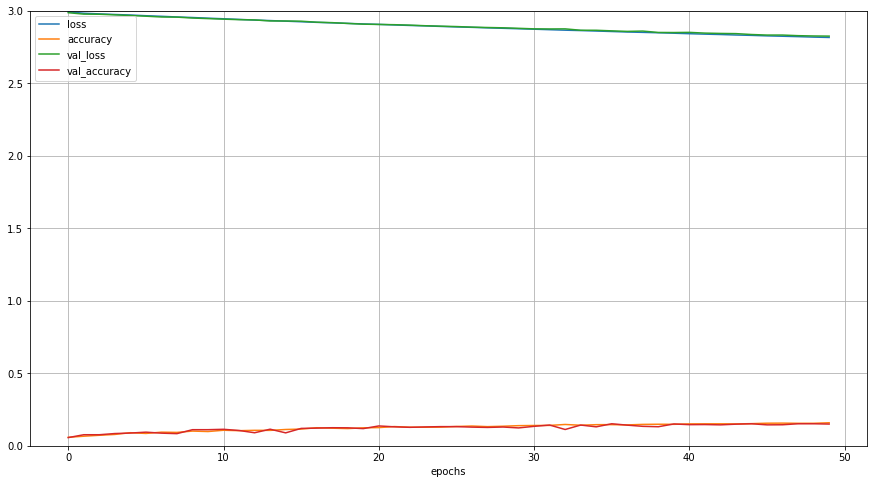

In [39]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,3)
plt.xlabel("epochs")
plt.show()

In [41]:
model.evaluate(test_features,y_test)


115/115 [==============================] - 0s 1ms/step - loss: 2.8121 - accuracy: 0.1514


[2.812105178833008, 0.1513911634683609]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
准确率极低，存在欠拟合的现象，需要调整特征或者模型

#### c.改变实验设置： 以 TFIDF 为权重，对每个文档所含词向量进行加权平均得到文档向量，更改模型，增加训练次数，提高训练集准确率。


In [44]:
#计算权重平均文档向量函数
from nltk import word_tokenize
def tfidf_wtd_avg_word_vectors(words,tfidf_vector,tfidf_vocabulary,model,num_features):
    word_tfidfs=[tfidf_vector[0,tfidf_vocabulary.get(word)] if tfidf_vocabulary.get(word) else 0 for word in words]
    word_tfidf_map={word:tfidf_val for word,tfidf_val in zip(words,word_tfidfs)}
    feature_vector=np.zeros((num_features,),dtype='float64')
    vocabulary=set(model.index_to_key)
    wts=0
    for word in words:
        if word in vocabulary:
            word_vector=model[word]
            weighted_word_vector=word_tfidf_map[word]*word_vector
            wts=wts+word_tfidf_map[word]
            feature_vector=np.add(feature_vector,weighted_word_vector)
    if wts:
        feature_vector=np.divide(feature_vector,wts)
    return feature_vector

def tfidf_weighted_averaged_word_vectorizer(corpus,tfidf_vectors,tfidf_vocabulary,model,num_features):
    docs_tfidfs=[(doc,doc_tfidf) for doc,doc_tfidf in zip(corpus,tfidf_vectors)]
    features=[tfidf_wtd_avg_word_vectors(tokenized_sentence,tfidf,tfidf_vocabulary,model,num_features) for tokenized_sentence,tfidf in docs_tfidfs]
    return np.array(features)

In [42]:
tv = TfidfVectorizer(norm='l2', use_idf=True, smooth_idf=True) 


tv_train_features = tv.fit_transform(x_train) 
tv_test_features=tv.transform(x_test)
tv_vail_features=tv.transform(x_vali)

In [45]:
vocabulary=tv.vocabulary_

train_words=[word_tokenize(i) for i in x_train ]
test_words=[word_tokenize(i) for i in x_test ]
vail_words=[word_tokenize(i) for i in x_vali ]

In [46]:
train_features=tfidf_weighted_averaged_word_vectorizer(train_words,tv_train_features,vocabulary,glove_model,100)
test_features=tfidf_weighted_averaged_word_vectorizer(test_words,tv_test_features,vocabulary,glove_model,100)
vali_features=tfidf_weighted_averaged_word_vectorizer(vail_words,tv_vail_features,vocabulary,glove_model,100)

In [47]:
input_shape=(103025,)
model=keras.models.Sequential()
model.add(keras.layers.Dense(512,activation='relu',input_dim=100))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(80,activation='relu'))
model.add(keras.layers.Dense(20,activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               51712     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 80)                20560     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                1620      
Total params: 205,220
Trainable params: 205,220
Non-trainable params: 0
_________________________________________________________________


In [48]:
keras.optimizers.SGD(lr=learn_rate)
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])
history=model.fit(train_features,y_train,batch_size=batch_size,epochs=epochs,validation_data=(vali_features,y_vali))

Epoch 1/50
207/207 [==============================] - 0s 2ms/step - loss: 2.9818 - accuracy: 0.0876 - val_loss: 2.9618 - val_accuracy: 0.1172
Epoch 2/50
207/207 [==============================] - 0s 1ms/step - loss: 2.9421 - accuracy: 0.1537 - val_loss: 2.9173 - val_accuracy: 0.1725
Epoch 3/50
207/207 [==============================] - 0s 2ms/step - loss: 2.8905 - accuracy: 0.2025 - val_loss: 2.8528 - val_accuracy: 0.2140
Epoch 4/50
207/207 [==============================] - 0s 1ms/step - loss: 2.8096 - accuracy: 0.2399 - val_loss: 2.7467 - val_accuracy: 0.2618
Epoch 5/50
207/207 [==============================] - 0s 1ms/step - loss: 2.6822 - accuracy: 0.2773 - val_loss: 2.5908 - val_accuracy: 0.2911
Epoch 6/50
207/207 [==============================] - 0s 2ms/step - loss: 2.5159 - accuracy: 0.3164 - val_loss: 2.4126 - val_accuracy: 0.3217
Epoch 7/50
207/207 [==============================] - 0s 1ms/step - loss: 2.3409 - accuracy: 0.3564 - val_loss: 2.2487 - val_accuracy: 0.3695
Epoch 

In [49]:
history2=model.fit(train_features,y_train,batch_size=batch_size,epochs=30,validation_data=(vali_features,y_vali))

Epoch 1/30
207/207 [==============================] - 2s 8ms/step - loss: 1.4447 - accuracy: 0.5626 - val_loss: 1.5435 - val_accuracy: 0.5576
Epoch 2/30
207/207 [==============================] - 0s 2ms/step - loss: 1.4391 - accuracy: 0.5601 - val_loss: 1.5447 - val_accuracy: 0.5617
Epoch 3/30
207/207 [==============================] - 0s 2ms/step - loss: 1.4351 - accuracy: 0.5648 - val_loss: 1.5707 - val_accuracy: 0.5412
Epoch 4/30
207/207 [==============================] - 0s 2ms/step - loss: 1.4308 - accuracy: 0.5632 - val_loss: 1.5511 - val_accuracy: 0.5508
Epoch 5/30
207/207 [==============================] - 0s 1ms/step - loss: 1.4270 - accuracy: 0.5665 - val_loss: 1.5772 - val_accuracy: 0.5256
Epoch 6/30
207/207 [==============================] - 0s 1ms/step - loss: 1.4231 - accuracy: 0.5657 - val_loss: 1.5610 - val_accuracy: 0.5528
Epoch 7/30
207/207 [==============================] - 0s 1ms/step - loss: 1.4173 - accuracy: 0.5677 - val_loss: 1.5404 - val_accuracy: 0.5474
Epoch 

In [50]:
history3=model.fit(train_features,y_train,batch_size=batch_size,epochs=30,validation_data=(vali_features,y_vali))

Epoch 1/30
207/207 [==============================] - 0s 2ms/step - loss: 1.3227 - accuracy: 0.5948 - val_loss: 1.5151 - val_accuracy: 0.5508
Epoch 2/30
207/207 [==============================] - 0s 1ms/step - loss: 1.3185 - accuracy: 0.5948 - val_loss: 1.5130 - val_accuracy: 0.5658
Epoch 3/30
207/207 [==============================] - 0s 2ms/step - loss: 1.3139 - accuracy: 0.5942 - val_loss: 1.5246 - val_accuracy: 0.5576
Epoch 4/30
207/207 [==============================] - 0s 1ms/step - loss: 1.3126 - accuracy: 0.5952 - val_loss: 1.5251 - val_accuracy: 0.5576
Epoch 5/30
207/207 [==============================] - 0s 2ms/step - loss: 1.3075 - accuracy: 0.5983 - val_loss: 1.5339 - val_accuracy: 0.5637
Epoch 6/30
207/207 [==============================] - 0s 1ms/step - loss: 1.3052 - accuracy: 0.6014 - val_loss: 1.5100 - val_accuracy: 0.5726
Epoch 7/30
207/207 [==============================] - 0s 1ms/step - loss: 1.3003 - accuracy: 0.5990 - val_loss: 1.5189 - val_accuracy: 0.5583
Epoch 

In [97]:
loss=history.history['loss']+history2.history['loss']+history3.history['loss']
accuracy=history.history['accuracy']+history2.history['accuracy']+history3.history['accuracy']
val_loss=history.history['val_loss']+history2.history['val_loss']+history3.history['val_loss']
val_accuracy=history.history['val_accuracy']+history2.history['val_accuracy']+history3.history['val_accuracy']

mydict = {'loss': loss, 'accuracy': accuracy, 'val_loss': val_loss,'val_accuracy':val_accuracy} 

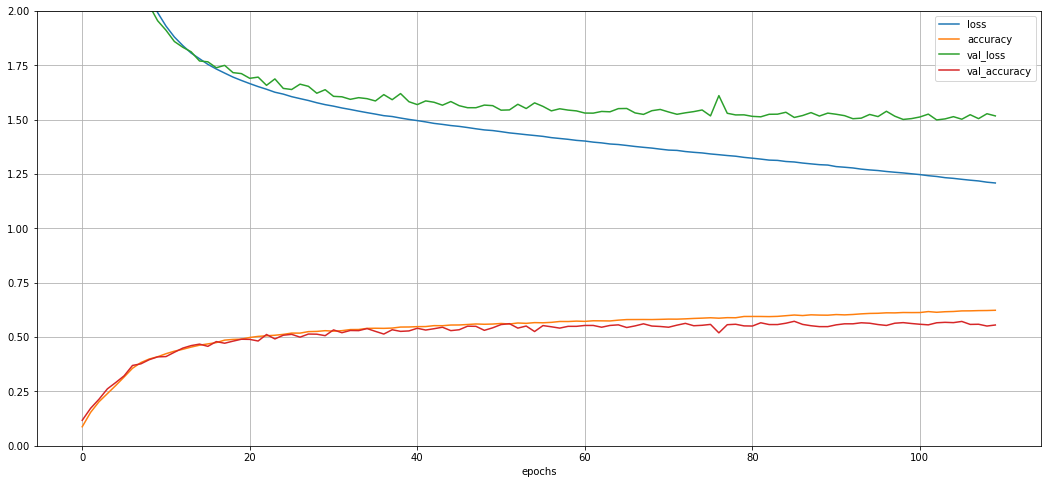

In [99]:
pd.DataFrame(mydict).plot(figsize=(18,8))
plt.grid(True)

plt.gca().set_ylim(0,2)

# xy = MultipleLocator(2)    # y轴每2一个刻度
# ax = plt.gca()
# ax.xaxis.set_major_locator(y)
plt.xlabel("epochs")
plt.show()

In [100]:
model.evaluate(test_features,y_test)

115/115 [==============================] - 0s 1ms/step - loss: 1.5410 - accuracy: 0.5458


[1.540981411933899, 0.5458264946937561]

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
结果分析和讨论：
 经过修改后，有些过拟合的情况。
 在使用TFIDF 为权重加权平均文档向量以及调整模型后，准确率从原先的0.15上升至0.55。